In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import sin, pi

In [2]:
g0 = 0
g1 = 1
def f(x):
    return 1 + pi * sin(pi*x) / 2

def kappa(x):
    return 1

def exact(x):
    return -x**2/2 + sin(pi*x)/2/pi +3*x/2

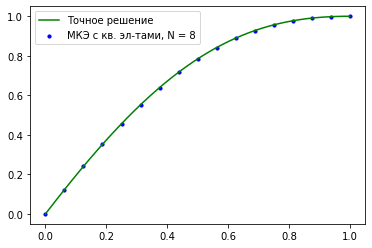

При N = 8 ошибка err = 5.7304101475086355e-06


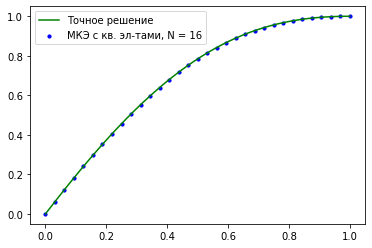

При N = 16 ошибка err = 3.667365521264898e-07, порядок сходимости p = 3.9658224321602407


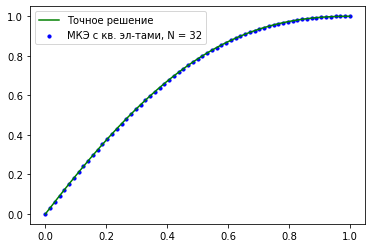

При N = 32 ошибка err = 2.3056340503480044e-08, порядок сходимости p = 3.9915086125599344


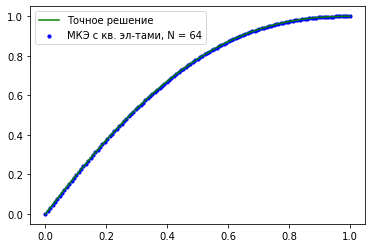

При N = 64 ошибка err = 1.443353658814317e-09, порядок сходимости p = 3.9976668012759733


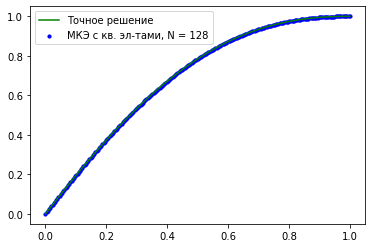

При N = 128 ошибка err = 9.11399844483185e-11, порядок сходимости p = 3.985196905968121


In [3]:
old_err = None
for i in range(5):
    N = 8*2**i
    M = 2*N + 1

    L = np.zeros([3, N])
    for j in range(N):
        L[0][j] = j*2
        L[1][j] = j*2+1
        L[2][j] = j*2+2

    A = np.zeros([M,M])
    F = np.zeros(M)
    h = 1/N
    for k in range(N):
        Ak = kappa((k+1/2)*h)*np.array([[7, -8, 1],[-8, 16, -8], [1, -8, 7]])/(3*h)
        A[2*k:2*k+3, 2*k:2*k+3] += Ak
        Fk = h*np.array([[4, 2, -1],[2, 16, 2],[-1, 2, 4]])@(np.array([f(L[0,k]*h/2), f(L[1,k]*h/2), f(L[2,k]*h/2)]))/30
        F[2*k:2*k+3] += Fk

    A[0][:3] = [1,0,0]
    F[0] = g0
  
    A[-1][-3:] = [0,0,1]  
    F[-1] = g1
  
    U = np.linalg.solve(A,F)

    plt.plot(np.linspace(0,1,1000), [exact(x) for x in np.linspace(0,1,1000)], label = 'Точное решение', c = 'g')
    plt.scatter(np.linspace(0,1,M), U, c = 'b', label = 'МКЭ с кв. эл-тами, N = %r'%N, s = 10)
    plt.legend()
    plt.show()
    err = abs(np.array([exact(x) for x in np.linspace(0,1,M)]) - U).max()
    if old_err:
        p = np.log2(old_err/err)
        print('При N = %r ошибка err = %r, порядок сходимости p = %r'%(N, err, p))
    else:
        print('При N = %r ошибка err = %r'%(N, err))
    old_err = err